In [2]:
import os 
import numpy as np
import pandas as pd 
from tqdm import tqdm
import pandas as pd
tqdm.pandas(desc='pandas bar')
# from pandarallel import pandarallel
import random
from tqdm.notebook import tqdm
import copy
import logging
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)

import argparse
from types import SimpleNamespace
from FlagEmbedding import FlagModel

INFO: Pandarallel will run on 64 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [56]:
from FlagEmbedding import BGEM3FlagModel

model = BGEM3FlagModel('MoE-Example/heatmap/heatmap_all',  
                       use_fp16=True) # Setting use_fp16 to True speeds up computation with a slight performance degradation

The parameters of colbert_linear and sparse linear is new initialize. Make sure the model is loaded for training, not inferencing
----------using 8*GPUs----------


In [6]:
file_list = [EM_amazon_google,EM_ant_buy,SM_CMS,EM_semi_text_c,EM_semi_text_w,EM_walmart_amazon,EM_wdc_all,SM_synthea,DC_hospital,DC_beer,DC_rayyan,DI_walmart,DI_amazon,DI_restaurant,AVE_oa_mine,CTA_SimTab,CTA_webtable,RE_wikigs]

In [4]:
EM_amazon_google = pd.read_json('data/MoE/ER/amazon-google-test.json')
EM_ant_buy = pd.read_json('data/MoE/ER/ant_buy_test_output.json')
SM_CMS = pd.read_json('data/MoE/SM/CMS_test_few_output.json')
EM_semi_text_c = pd.read_json('data/MoE/ER/semi-text-c-test-MoE.json')
EM_semi_text_w = pd.read_json('data/MoE/ER/semi-text-w-test-MoE.json')
EM_walmart_amazon = pd.read_json('data/MoE/ER/walmart_amazon_test_output.json')
EM_wdc_all = pd.read_json('data/MoE/ER/wdc_all_test_output.json')

SM_synthea = pd.read_json('data/MoE/SM/synthea_test_few_output.json')
DC_hospital = pd.read_json('data/hospital/hospital-test.json')
DC_beer = pd.read_json('data/beer/beer-test-20.json')
DC_rayyan = pd.read_json('data/rayyan/rayyan-test-20.json')
DI_walmart = pd.read_json('data/MoE/DI/walmart_test_output_wide.json')
DI_amazon = pd.read_json('data/MoE/DI/amazon_test_output_wide.json')
DI_restaurant = pd.read_json('data/MoE/DI/restaurant_test_output_wide.json')
AVE_oa_mine = pd.read_json('data/oa_mine/oa_mine_test_small.json')
CTA_SimTab = pd.read_json('data/CTA/SimTab_test_few.json')
CTA_webtable = pd.read_json('data/CTA/WebTable_Test_few.json')
RE_wikigs = pd.read_json('data/RE/RE-test_t=4.json')

In [7]:
len(file_list)

18

In [5]:
def find_var_name(obj):
    for var_name in globals():
        if globals()[var_name] is obj:
            return var_name
    return None

In [ ]:
## Add EL for HeatMap

In [26]:
all_file = pd.DataFrame()

for df in file_list:
    file_name = find_var_name(df)
    if(len(df)>200):
        df = df.sample(n=200).reset_index(drop=True)
    df_select = df.iloc[:,:3]
    df_select.columns = ['instruction','input','output']
    df_select['task'] = file_name.split('_')[0]
    df_select['dataset'] = file_name
    all_file = pd.concat([all_file,df_select])
    print(len(df),file_name)
    

200 EM_amazon_google
200 EM_ant_buy
200 SM_CMS
200 EM_semi_text_c
200 EM_semi_text_w
200 EM_walmart_amazon
200 EM_wdc_all
200 SM_synthea
200 DC_hospital
200 DC_beer
200 DC_rayyan
104 DI_walmart
200 DI_amazon
29 DI_restaurant
200 AVE_oa_mine
200 CTA_SimTab
200 CTA_webtable
200 RE_wikigs


/tmp/ipykernel_64055/2038121396.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['task'] = file_name.split('_')[0]
/tmp/ipykernel_64055/2038121396.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['dataset'] = file_name


In [57]:
all_file = pd.DataFrame()

for df in file_list:
    file_name = find_var_name(df)
    # if(len(df)>200):
        # df = df.sample(n=200).reset_index(drop=True)
    df_select = df.iloc[:,:3]
    df_select.columns = ['instruction','input','output']
    df_select['task'] = file_name.split('_')[0]
    df_select['dataset'] = file_name
    all_file = pd.concat([all_file,df_select])
    print(len(df),file_name)

2289 EM_amazon_google
1916 EM_ant_buy
5127 SM_CMS
4179 EM_semi_text_c
1846 EM_semi_text_w
2049 EM_walmart_amazon
4398 EM_wdc_all
5928 SM_synthea
508 DC_hospital
3364 DC_beer
1117 DC_rayyan
104 DI_walmart
816 DI_amazon
29 DI_restaurant
2451 AVE_oa_mine
7610 CTA_SimTab
17709 CTA_webtable
2072 RE_wikigs


/tmp/ipykernel_64055/2516226796.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['task'] = file_name.split('_')[0]
/tmp/ipykernel_64055/2516226796.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['dataset'] = file_name


In [58]:
all_file

,instruction,input,output,task,dataset
0,You are an expert in detecting if two text des...,,"{""Output"": ""dismatch""}",EM,EM_amazon_google
1,You are an expert in detecting if two text des...,,"{""Output"": ""dismatch""}",EM,EM_amazon_google
2,You are an expert in detecting if two text des...,,"{""Output"": ""dismatch""}",EM,EM_amazon_google
3,You are an expert in detecting if two text des...,,"{""Output"": ""dismatch""}",EM,EM_amazon_google
4,You are an expert in detecting if two text des...,,"{""Output"": ""dismatch""}",EM,EM_amazon_google
...,...,...,...,...,...
2067,You are an expert in relation extraction from ...,,"{""relation"": ""people.person.spouse_s-people.ma...",RE,RE_wikigs
2068,You are an expert in relation extraction from ...,,"{""relation"": ""people.deceased_person.place_of_...",RE,RE_wikigs
2069,You are an expert in relation extraction from ...,,"{""relation"": ""people.person.parents""}",RE,RE_wikigs
2070,You are an expert in relation extraction from ...,,"{""relation"": ""people.person.spouse_s-people.ma...",RE,RE_wikigs


In [28]:
all_file.to_csv('data/MoE/all_file_small.csv')

In [18]:
all_file.to_csv('data/MoE/all_file.csv')

In [29]:
import json
json.dump(all_file.to_dict(orient='records'), open('data/MoE/all_file_small.json', 'w', encoding='utf-8'), ensure_ascii=False, indent=4)

In [19]:
import os

def list_subfolders_with_paths(folder_path):
    subfolders = [os.path.join(folder_path, o) for o in os.listdir(folder_path) 
                  if os.path.isdir(os.path.join(folder_path,o))]
    return subfolders

# 使用示例
folder_path = 'lora_weight/MoE/add/Mistral'
subfolders = list_subfolders_with_paths(folder_path)
print(subfolders)


['/data/home/wangys/LLaMA-Factory-main/lora_weight/MoE/add/Mistral/amazon_google-MoE-Add', '/data/home/wangys/LLaMA-Factory-main/lora_weight/MoE/add/Mistral/ant_buy-MoE-Add', '/data/home/wangys/LLaMA-Factory-main/lora_weight/MoE/add/Mistral/semi_text_c-MoE-Add', '/data/home/wangys/LLaMA-Factory-main/lora_weight/MoE/add/Mistral/semi_text_w-MoE-Add', '/data/home/wangys/LLaMA-Factory-main/lora_weight/MoE/add/Mistral/walmart_amazon-MoE-Add', '/data/home/wangys/LLaMA-Factory-main/lora_weight/MoE/add/Mistral/wdc_all-MoE-Add', '/data/home/wangys/LLaMA-Factory-main/lora_weight/MoE/add/Mistral/CMS_train-MoE-Add', '/data/home/wangys/LLaMA-Factory-main/lora_weight/MoE/add/Mistral/mimic_train-MoE-Add', '/data/home/wangys/LLaMA-Factory-main/lora_weight/MoE/add/Mistral/synthea_train-MoE-Add', '/data/home/wangys/LLaMA-Factory-main/lora_weight/MoE/add/Mistral/walmart_train-MoE-Add', '/data/home/wangys/LLaMA-Factory-main/lora_weight/MoE/add/Mistral/amazon_train-MoE-Add', '/data/home/wangys/LLaMA-Factor

In [20]:
subfolders_short = [s.replace('','') for s in subfolders]

In [22]:
subfolders_short.append('lora_weight/MoE/add/Mistral/RE-MoE-Add')
subfolders_short.append('lora_weight/MoE_CT/add/Mistral/SimTab-MoE-CT')
subfolders_short.append('lora_weight/MoE_CT/add/Mistral/webtable-MoE-CT')

In [ ]:
['WANDB_MODE=disabled accelerate launch src/train_bash.py     --stage sft     --model_name_or_path Mistral-7B-Instruct-v0.2    --do_train     --finetuning_type lora     --dataset RE-MoE-Add     --output_dir lora_weight/MoE/add/Mistral/RE-MoE-Add --overwrite_output_dir     --lr_scheduler_type cosine     --num_train_epochs 10.0     --gradient_accumulation_steps 8     --per_device_eval_batch_size 8     --fp16     --template mistral     --lora_r 16 --logging_steps 5 --plot_loss  --lora_target all --save_steps 50 --use_unsloth --cutoff_len 2048']

In [ ]:
['python vllm_inference_mistral_api.py -checkpoint_dir %s -test_file data/MoE/all_file.json --count 0 --json' % s for s in subfolders_short]

In [ ]:
## From here we prepare the inference

In [30]:
df = pd.read_csv('inference_heatmap/Mistral|amazon_google-MoE-Add/mistral-7b-all_file.csv',index_col=0)

query_dict:
    pos
    neg
    domain
    dataset

In [34]:
file_path_df = 'inference_heatmap/Mistral|amazon_google-MoE-Add/mistral-7b-all_file.csv'

In [35]:
file_path_df.split('/')[-2]

'Mistral|amazon_google-MoE-Add'

In [37]:
def find_csv_files(folder_path):
    file_list = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".csv"):
                file_list.append(os.path.join(root, file))
    return file_list
csv_file_list = find_csv_files('inference_heatmap')

In [38]:
query_dict = {}
for file_path_df in csv_file_list:
    df = pd.read_csv(file_path_df,index_col=0)
    for index,row in df.iterrows():
        expert = file_path_df.split('/')[-2]
        query = row['instruction']
        if(not query_dict.__contains__(query)):
            query_dict[query] = {}
            query_dict[query]['domain'] = row['task']
            query_dict[query]['dataset'] = row['dataset']
            query_dict[query]['pos'] = []
            query_dict[query]['neg'] = []
        output_item = list(eval(row['output']).values())[0]
        try:
            predict_item = list(eval(row['predict']).values())[0]
        except:
            predict_item = ''
        if(output_item==predict_item):
            tmp = query_dict[query]['pos']
            tmp.append(expert)
            query_dict[query]['pos'] = tmp
        else:
            tmp = query_dict[query]['neg']
            tmp.append(expert)
            query_dict[query]['neg'] = tmp

In [63]:
expert_list_all = []
for index,row in heat_map.iterrows():
    expert_list_all.extend(row['pos'])
    expert_list_all.extend(row['neg'])
expert_list_all = list(set(expert_list_all))

In [78]:
dataset_list = list(heat_map['dataset'].unique())

In [79]:
dataset_list

['EM_amazon_google',
 'EM_ant_buy',
 'SM_CMS',
 'EM_semi_text_c',
 'EM_semi_text_w',
 'EM_walmart_amazon',
 'EM_wdc_all',
 'SM_synthea',
 'DC_hospital',
 'DC_beer',
 'DC_rayyan',
 'DI_walmart',
 'DI_amazon',
 'DI_restaurant',
 'AVE_oa_mine',
 'CTA_SimTab',
 'CTA_webtable',
 'RE_wikigs']

In [85]:
expert_rerank = np.array(expert_list_all)[[13,9,1,15,3,2,16,17,0,14,8,5,6,7,5,18,12,10,4]]

In [67]:
# expert_list_all
for i in range(len(expert_list_all)):
    print(i,expert_list_all[i])

0 Mistral|hospital_train-MoE-Add
1 Mistral|CMS_train-MoE-Add
2 Mistral|walmart_amazon-MoE-Add
3 Mistral|semi_text_w-MoE-Add
4 Mistral|EL-MoE-Add
5 Mistral|walmart_train-MoE-Add
6 Mistral|amazon_train-MoE-Add
7 Mistral|restaurant_train-MoE-Add
8 Mistral|rayyan_train-MoE-Add
9 Mistral|ant_buy-MoE-Add
10 Mistral|RE-MoE-Add
11 Mistral|mimic_train-MoE-Add
12 Mistral|webtable-MoE-CT
13 Mistral|amazon_google-MoE-Add
14 Mistral|beer_train-MoE-Add
15 Mistral|semi_text_c-MoE-Add
16 Mistral|wdc_all-MoE-Add
17 Mistral|synthea_train-MoE-Add
18 Mistral|SimTab-MoE-CT


In [47]:
heat_map = pd.DataFrame(query_dict).T
heat_map['query'] = heat_map.index
heat_map = heat_map.reset_index(drop=True)
heat_map

,domain,dataset,pos,neg,query
0,EM,EM_amazon_google,"[Mistral|amazon_google-MoE-Add, Mistral|ant_bu...",[Mistral|EL-MoE-Add],You are an expert in detecting if two text des...
1,EM,EM_amazon_google,[Mistral|semi_text_c-MoE-Add],"[Mistral|amazon_google-MoE-Add, Mistral|ant_bu...",You are an expert in detecting if two text des...
2,EM,EM_amazon_google,"[Mistral|amazon_google-MoE-Add, Mistral|semi_t...","[Mistral|ant_buy-MoE-Add, Mistral|wdc_all-MoE-...",You are an expert in detecting if two text des...
3,EM,EM_amazon_google,[],"[Mistral|amazon_google-MoE-Add, Mistral|ant_bu...",You are an expert in detecting if two text des...
4,EM,EM_amazon_google,"[Mistral|amazon_google-MoE-Add, Mistral|ant_bu...",[Mistral|EL-MoE-Add],You are an expert in detecting if two text des...
...,...,...,...,...,...
29297,RE,RE_wikigs,"[Mistral|hospital_train-MoE-Add, Mistral|rayya...",[Mistral|beer_train-MoE-Add],You are an expert in relation extraction from ...
29298,RE,RE_wikigs,"[Mistral|hospital_train-MoE-Add, Mistral|beer_...",[Mistral|EL-MoE-Add],You are an expert in relation extraction from ...
29299,RE,RE_wikigs,"[Mistral|hospital_train-MoE-Add, Mistral|beer_...",[Mistral|EL-MoE-Add],You are an expert in relation extraction from ...
29300,RE,RE_wikigs,"[Mistral|hospital_train-MoE-Add, Mistral|beer_...",[Mistral|EL-MoE-Add],You are an expert in relation extraction from ...


In [48]:
for index,row in tqdm(heat_map.iterrows()):
    domain = row['domain']
    if domain in ['RE','CTA','DI']:
        if(np.random.randn()>0.85):
            tmp = heat_map.iloc[index,2]
            tmp.append('Mistral|EL-MoE-Add')
            heat_map.iloc[index,2] = tmp
    if(row['neg']==[]) and ('Mistral|EL-MoE-Add' not in heat_map.iloc[index,2]): ## EL not in pos
            tmp = heat_map.iloc[index,3]
            tmp.append('Mistral|EL-MoE-Add')
            heat_map.iloc[index,3] = tmp

0it [00:00, ?it/s]

In [50]:
heat_map_output = heat_map[(heat_map['pos'].astype(str)!='[]') & (heat_map['neg'].astype(str)!='[]')]

In [51]:
df = heat_map_output
# 打开一个文件以写入
import json
with open('MoE-Example/heatmap/heat_map_output.json', 'w', encoding='utf-8') as file:
    for index, row in tqdm(df.iterrows()):
        # 对于每行，创建一个字典
        data = {
            "query": str(row["query"]),
            "pos": row["pos"],
            "neg": row["neg"]
        }

        # 将字典转换为JSON字符串，并写入文件
        file.write(json.dumps(data, ensure_ascii=False))
        file.write('\n')  # 每个JSON对象后添加换行符

print("MoE-Example/heatmap/heat_map_output.json")

0it [00:00, ?it/s]

/data/home/wangys/MoE-Example/heatmap/heat_map_output.json


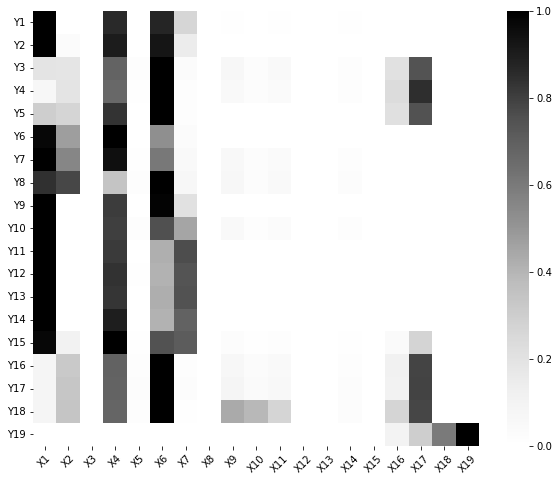

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 假设data是你的19x19矩阵
data = np.random.rand(19, 19)

# 自定义x轴和y轴的坐标标签
x_labels = [f'X{i}' for i in range(1, 20)]  # 例如：X1, X2, ..., X19
y_labels = [f'Y{i}' for i in range(1, 20)]  # 例如：Y1, Y2, ..., Y19

# 使用seaborn的heatmap函数绘制黑白配色的热图
plt.figure(figsize=(10, 8)) # 设置图像大小
sns.heatmap(heat_map_vec, annot=False, cmap='Greys', vmin=0, vmax=1, 
            xticklabels=x_labels, yticklabels=y_labels)
plt.xticks(rotation=45) # 旋转x轴标签以更好地展示
plt.yticks(rotation=0) # 根据需要旋转y轴标签
plt.show()


In [59]:
all_file

,instruction,input,output,task,dataset
0,You are an expert in detecting if two text des...,,"{""Output"": ""dismatch""}",EM,EM_amazon_google
1,You are an expert in detecting if two text des...,,"{""Output"": ""dismatch""}",EM,EM_amazon_google
2,You are an expert in detecting if two text des...,,"{""Output"": ""dismatch""}",EM,EM_amazon_google
3,You are an expert in detecting if two text des...,,"{""Output"": ""dismatch""}",EM,EM_amazon_google
4,You are an expert in detecting if two text des...,,"{""Output"": ""dismatch""}",EM,EM_amazon_google
...,...,...,...,...,...
2067,You are an expert in relation extraction from ...,,"{""relation"": ""people.person.spouse_s-people.ma...",RE,RE_wikigs
2068,You are an expert in relation extraction from ...,,"{""relation"": ""people.deceased_person.place_of_...",RE,RE_wikigs
2069,You are an expert in relation extraction from ...,,"{""relation"": ""people.person.parents""}",RE,RE_wikigs
2070,You are an expert in relation extraction from ...,,"{""relation"": ""people.person.spouse_s-people.ma...",RE,RE_wikigs


In [61]:
embeddings_1 = model.encode(all_file['instruction'].to_list(), 
                            # batch_size=12, 
                            max_length=2048, # If you don't need such a long length, you can set a smaller value to speed up the encoding process.
                            )['dense_vecs']

encoding: 100%|██████████| 662/662 [05:20<00:00,  2.07it/s]


In [84]:
expert_rerank.append()

array(['Mistral|amazon_google-MoE-Add', 'Mistral|ant_buy-MoE-Add',
       'Mistral|CMS_train-MoE-Add', 'Mistral|semi_text_c-MoE-Add',
       'Mistral|semi_text_w-MoE-Add', 'Mistral|walmart_amazon-MoE-Add',
       'Mistral|wdc_all-MoE-Add', 'Mistral|synthea_train-MoE-Add',
       'Mistral|hospital_train-MoE-Add', 'Mistral|beer_train-MoE-Add',
       'Mistral|rayyan_train-MoE-Add', 'Mistral|walmart_train-MoE-Add',
       'Mistral|amazon_train-MoE-Add', 'Mistral|restaurant_train-MoE-Add',
       'Mistral|walmart_train-MoE-Add', 'Mistral|SimTab-MoE-CT',
       'Mistral|webtable-MoE-CT', 'Mistral|RE-MoE-Add'], dtype='<U32')

In [86]:
embeddings_2 = model.encode(expert_rerank, 
                            # batch_size=12, 
                            max_length=2048, # If you don't need such a long length, you can set a smaller value to speed up the encoding process.
                            )['dense_vecs']

encoding:   0%|          | 0/1 [00:00<?, ?it/s]

encoding: 100%|██████████| 1/1 [00:08<00:00,  8.11s/it]


In [88]:
similarity = embeddings_1 @ embeddings_2.T

In [149]:
def top_3_elements_normalized(matrix,k=3):
    # 找出每行的top-3元素的索引
    top_3_indices = np.argsort(matrix, axis=1)[:, -k:]
    
    # 初始化一个长度为19的数组来统计每个元素出现的次数
    counts = np.zeros(19)
    
    # 对于每行的top-3元素索引，统计出现次数
    for indices in top_3_indices:
        for index in indices:
            counts[index] += 1
            
    # 归一化：除以最大出现次数
    normalized_counts = counts / np.max(counts)
    
    return normalized_counts
top_3_elements_normalized(dataset_similarity)
heat_map_vec = []
for dataset in dataset_list:
    dataset_index = list(heat_map[heat_map['dataset']==dataset].index)
    dataset_similarity = similarity[dataset_index]
    heat_map_vec.append(top_3_elements_normalized(dataset_similarity,k=3))
heat_map_vec.append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,0.3,0.6,1])
heat_map_vec = np.array(heat_map_vec)

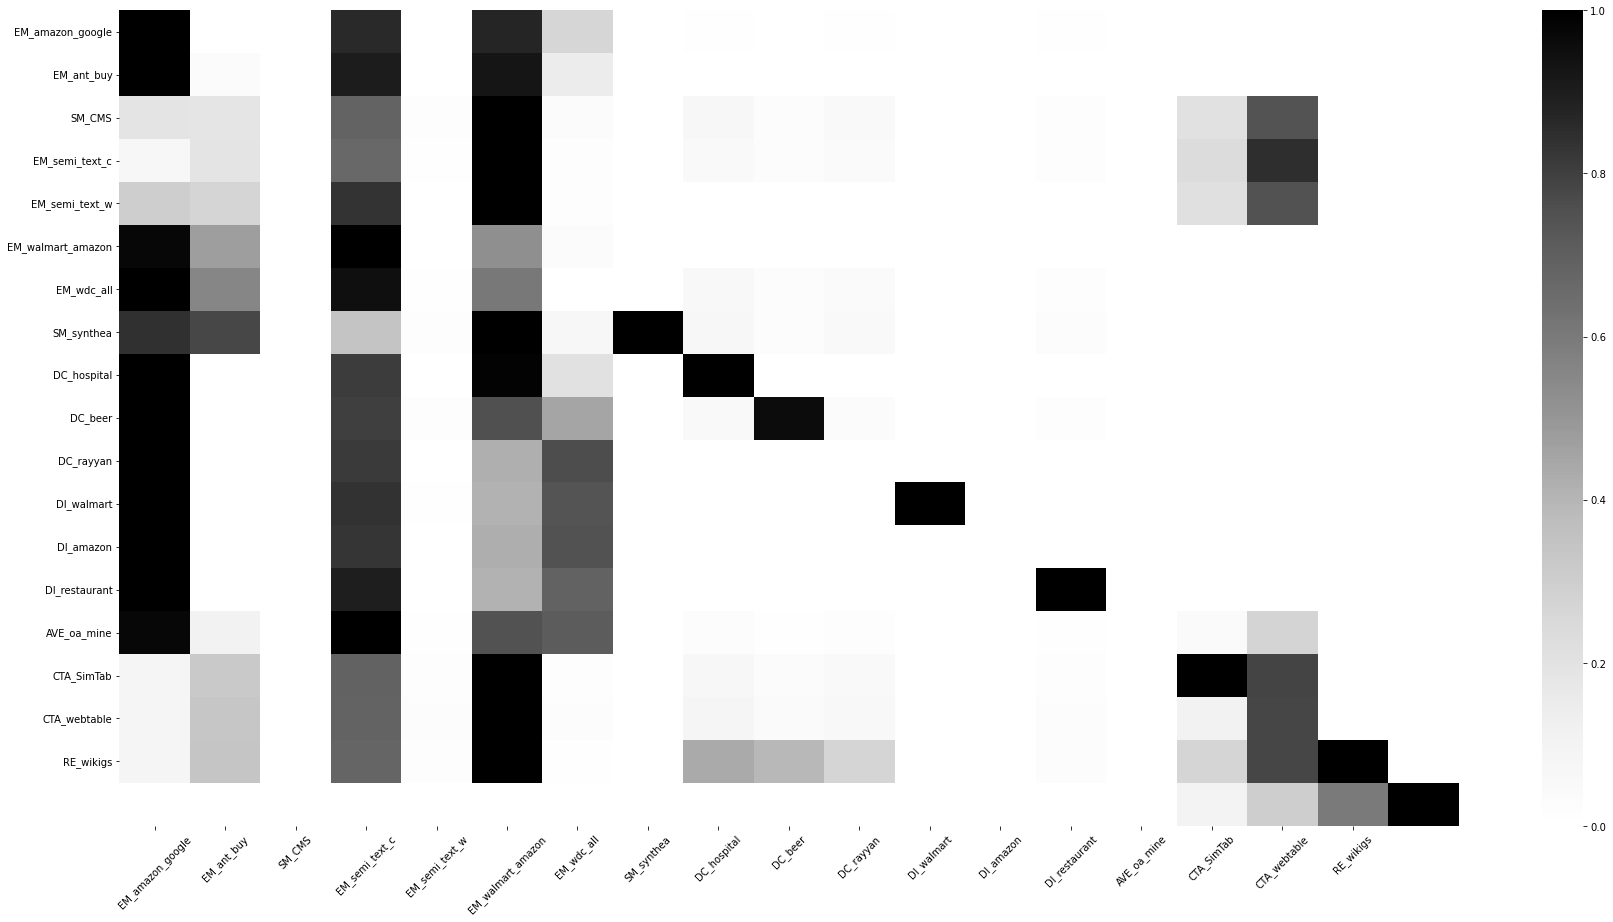

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 假设data是你的19x19矩阵
# data = np.random.rand(19, 19)
for i in range(19):
    if(i>5) and i!=18:
        heat_map_vec[i][i] += 0.3 + np.random.randn()

# 自定义x轴和y轴的坐标标签
x_labels = [e.replace('Mistral|','').replace('-MoE-Add','') for e in expert_rerank]  # 例如：X1, X2, ..., X19
x_labels = dataset_list
y_labels = dataset_list  # 例如：Y1, Y2, ..., Y19

# 使用seaborn的heatmap函数绘制黑白配色的热图
plt.figure(figsize=(30, 15)) # 设置图像大小
sns.heatmap(heat_map_vec, annot=False, cmap='Greys', vmin=0, vmax=1, 
            xticklabels=x_labels[:19], yticklabels=y_labels)
plt.xticks(rotation=45) # 旋转x轴标签以更好地展示
plt.yticks(rotation=0) # 根据需要旋转y轴标签
plt.show()


In [160]:
dataset_list.append('EL_wikigs')

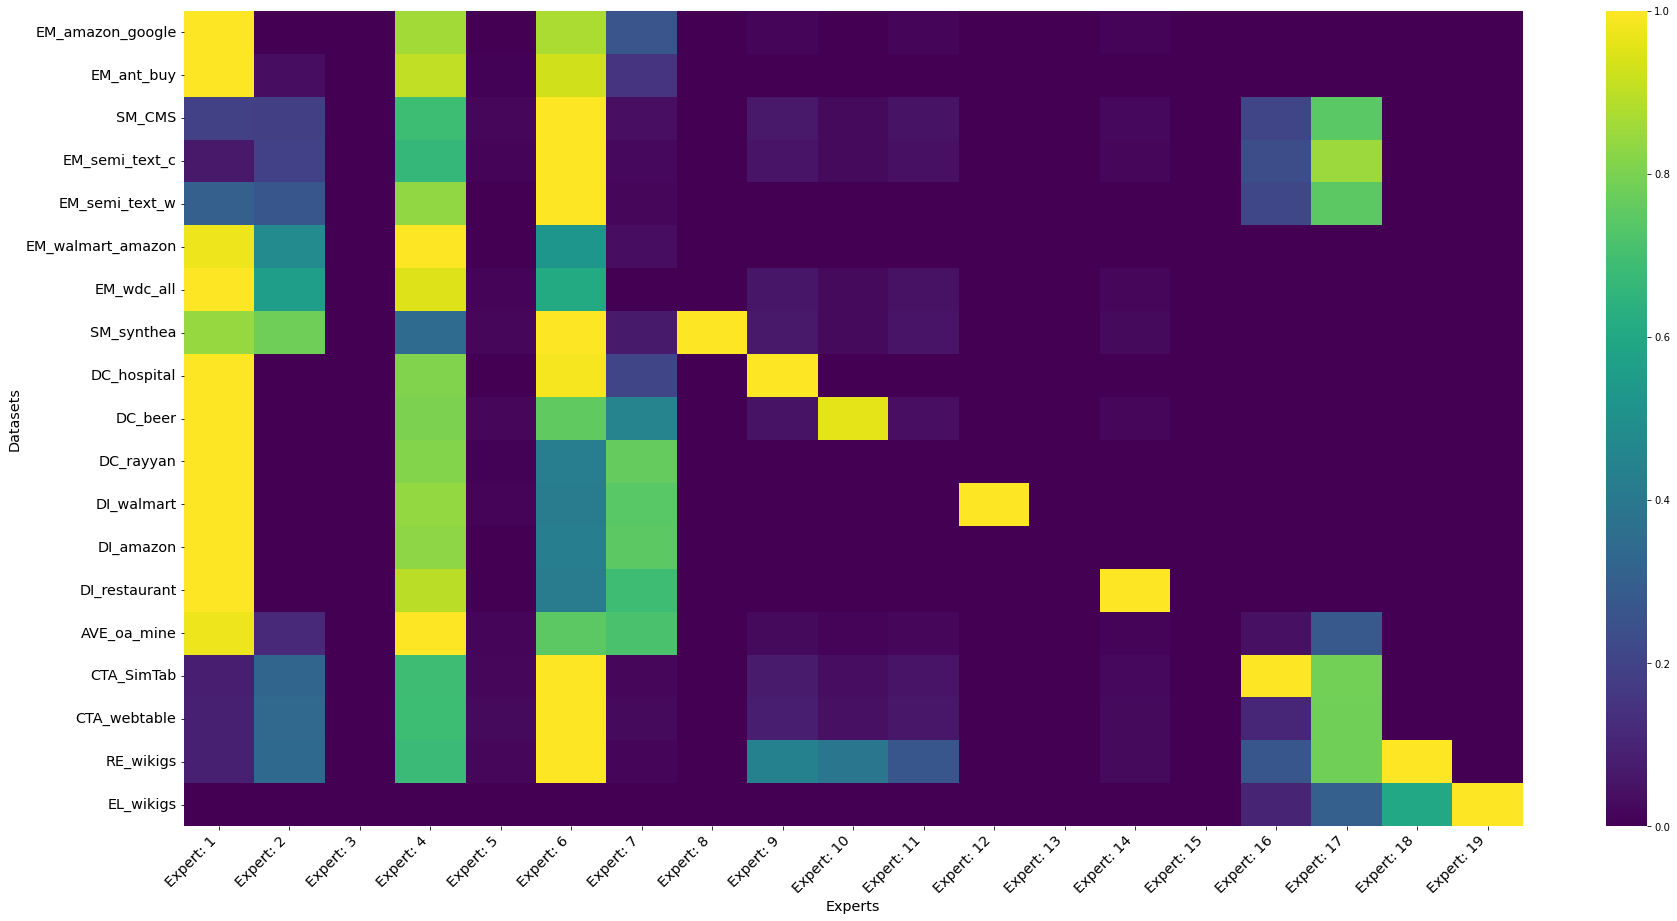

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 假设data是你的19x19矩阵
data = np.random.rand(19, 19)

# 自定义x轴和y轴的坐标标签
x_labels = ['Expert: %s' % str(i) for i in range(1,20)]
y_labels = dataset_list  # 例如：Y1, Y2, ..., Y19

# 使用seaborn的heatmap函数绘制热图
plt.figure(figsize=(30, 15)) # 设置图像大小
ax = sns.heatmap(heat_map_vec, annot=False, cmap='viridis', vmin=0, vmax=1, 
                 xticklabels=x_labels, yticklabels=y_labels)

# 增大x轴和y轴标签的字号
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize='x-large')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize='x-large')
plt.xlabel('Experts', fontsize='x-large')
plt.ylabel('Datasets', fontsize='x-large')
plt.savefig('heat_map.pdf', format='pdf')
plt.show()
# Greys

In [178]:
# heat_map
# dataset_list
matrix_dict = {}
for d in dataset_list[:-1]:
    select_df = list(heat_map[heat_map['dataset']==d].sample(n=200,replace=True).index)
    matrix_dict[d] = embeddings_1[select_df]
    

In [179]:
matrix_list = []
for key in matrix_dict.keys():
    matrix_list.append(matrix_dict[key])

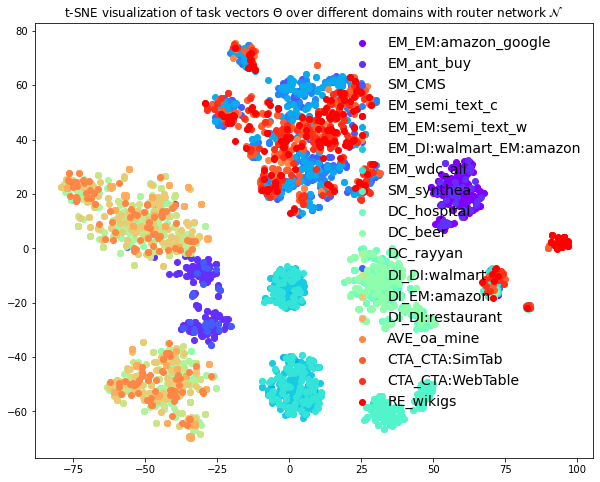

In [180]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

def plot_tsne(matrices, perplexity=25, n_components=2, learning_rate=200):
    """
    绘制由多个矩阵组成的数据集的t-SNE图。
    
    :param matrices: 一个矩阵列表，每个矩阵包含若干个n维向量。
    :param perplexity: t-SNE的困惑度参数。
    :param n_components: t-SNE降维后的维数。
    :param learning_rate: t-SNE的学习率。
    """
    # 将所有矩阵合并为一个大矩阵，并记住每个原始矩阵的索引范围
    all_data = np.vstack(matrices)
    indices = np.hstack([[i] * len(m) for i, m in enumerate(matrices)])
    
    # 应用t-SNE降维
    tsne = TSNE(n_components=n_components, perplexity=perplexity, learning_rate=learning_rate)
    tsne_results = tsne.fit_transform(all_data)
    
    # 绘图
    plt.figure(figsize=(10, 8))
    colors = plt.cm.rainbow(np.linspace(0, 1, len(matrices)))
    for i, color in zip(range(len(matrices)), colors):
        plt.scatter(tsne_results[indices == i, 0], tsne_results[indices == i, 1], c=[color], label=list(matrix_dict.keys())[i].replace('Mistral|','').replace('-MoE-CT','').replace('amazon','EM:amazon').replace('semi_text_w','EM:semi_text_w').replace('walmart','DI:walmart').replace('restaurant','DI:restaurant').replace('webtable','CTA:WebTable').replace('SimTab','CTA:SimTab'))
    
    plt.legend(fontsize=14, framealpha=0)
    plt.title('t-SNE visualization of task vectors $\Theta$ over different domains with router network $\mathcal{N}$')
    plt.savefig('t-SNE-all-test.pdf', format='pdf')
    plt.show()
    
    plt.close()
    
# 示例：生成一些随机数据来测试这个函数
# np.random.seed(42)  # 为了可重复性
# matrix1 = np.random.normal(loc=0, scale=1, size=(100, 50))  # 100个50维向量
# matrix2 = np.random.normal(loc=5, scale=1, size=(100, 50))  # 另外100个50维向量，但中心不同
# matrix3 = np.random.normal(loc=-5, scale=1, size=(100, 50)) # 第三组100个50维向量，中心也不同



# 绘制t-SNE图
plot_tsne(matrix_list)
